# Homework6: Flow models

## Task 1: Theory (5pt)

### Problem 1: KFP theorem (1pt)

We have faced with 2 different formulations of Kolmogorov-Fokker-Planck theorem.

1) continuity equation in continuous-in-time NF:
$$
\frac{d \log p(\mathbf{x}(t), t)}{d t} = - \text{tr} \left( \frac{\partial f(\mathbf{x}, t)}{\partial \mathbf{x}} \right);
$$

2) the general form of the KFP equation in SDEs:
$$
\frac{\partial p(\mathbf{x}, t)}{\partial t} = - \text{div}\left(\mathbf{f}(\mathbf{x}, t) p(\mathbf{x}, t)\right) + \frac{1}{2} g^2(t) \Delta p(\mathbf{x}, t).
$$

In this task your goal is to prove that the first formulation is a special case of the more general second formulation.

**Note:** The derivation in the first formulation is total derivative (not partial).

```
your solution
```

### Problem 2: DDPM as SDE discretization (2pt)

We have proved that DDPM is a discretization of the SDE
$$
	d \mathbf{x} = - \frac{1}{2} \beta(t) \mathbf{x}(t) dt + \sqrt{\beta(t)} \cdot d \mathbf{w}.
$$
Here $\mathbf{f}(\mathbf{x}, t) = - \frac{1}{2} \beta(t) \mathbf{x}(t)$, $g(t) = \sqrt{\beta(t)}$.

Recall reverse SDE
$$
    d\mathbf{x} = \left(\mathbf{f}(\mathbf{x}, t) - g^2(t) \frac{\partial \log p_t(\mathbf{x})}{\partial \mathbf{x}}\right) dt + g(t) d \mathbf{w}.
$$

The reverse SDE of the DDPM model will be
$$
    d\mathbf{x}(t) = -\beta(t)\left[\frac{x(t)}{2} + \nabla_{\mathbf{x}}\log p_t(\mathbf{x}(t))\right]dt + \sqrt{\beta(t)}d\mathbf{w}.
$$

The DDPM uses the following form of ancestral sampling
$$
\mathbf{x}_{t-1} = \frac{1}{\sqrt{1 - \beta_t}} \cdot \mathbf{x}_t + \frac{\beta_t}{\sqrt{1 - \beta_t}} \cdot \nabla_{\mathbf{x}_t} \log p(\mathbf{x}_t | \boldsymbol{\theta}) +  \sqrt{\beta_t} \cdot \boldsymbol{\epsilon}.
$$
(Here we assumed that $p(\mathbf{x}_{t - 1} | \mathbf{x}_t, \boldsymbol{\theta}) = \mathcal{N} \bigl(\boldsymbol{\mu}_{\boldsymbol{\theta}, t}(\mathbf{x}_t), \beta_t \cdot \mathbf{I}\bigr)$).

Here is your task to validate that DDPM iterative update scheme is actually discretization of SDE by letting $t \in \{0,\ldots,\frac{N-1}{N}\}$, $\Delta t = 1/N$, $\mathbf{x}(t-\Delta t) = \mathbf{x}_{s-s}$, $\mathbf{x}(t) = \mathbf{x}_s$, and $\beta(t)\Delta t = \beta_s$, s.e.:

In this task your goal is to show that the ancestral sampling is a discretization of the DDPM reverse SDE.

**Hints**:
1. use $dt < 0$;
2. $\beta_t = - \beta(t) dt$;
3. $d\mathbf{w} = \boldsymbol{\epsilon} \cdot \sqrt{-dt}$;
4. drop the terms with the order of $o(dt)$.

```
your solution
```

### Problem 3: Flow matching distribution (2pt)

Let consider flow matching model between two same distributions:
$$
    p_0(x) = \mathcal{N}(0, \sigma^2) \quad p_1(x) = \mathcal{N}(0, \sigma^2)
$$

Your goal is to find the analytical expression for distribution $p_t(x_t)$.

**Note:** you have to get nonlinear expression for variance, try to understand this effect.

```
your solution
```

In [1]:
COMMIT_HASH = "11668881e2da2ea7938417bdabda0397660508c8"
!if [ -d dgm_utils ]; then rm -Rf dgm_utils; fi
!git clone https://github.com/r-isachenko/dgm_utils.git
%cd dgm_utils
!git checkout {COMMIT_HASH}
!pip install ./
!pip install torchdiffeq
%cd ./..
!rm -Rf dgm_utils

Cloning into 'dgm_utils'...
remote: Enumerating objects: 184, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 184 (delta 119), reused 83 (delta 43), pack-reused 0 (from 0)
Receiving objects: 100% (184/184), 40.83 KiB | 2.27 MiB/s, done.
Resolving deltas: 100% (119/119), done.
/workspace/dgm_utils
fatal: reference is not a tree: 11668881e2da2ea7938417bdabda0397660508c8


/usr/local/lib/python3.11/dist-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Processing /workspace/dgm_utils
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 355.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 232.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 309.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 367.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 323.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 79.6 MB/s eta 0:00:00a 0:00:01
  Created wheel for dgm_utils: filename=dgm_utils-0.1.1-py3-none-any.whl size=6094 sha256=b9d5b3a632c0c83ecfe9f3e772e4b40f0e98873b6dbed9b4fff29fc74c34b2fd
  Stored in directory: /tmp/pip-ephem-wheel-cache-sgv1yo6c/wheels/13/f0/d0/acc3e03c4b4e910d91c44636f86371b8ae49179071b0ed2ea9
Successfully built dgm_utils

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A n

In [2]:
from dgm_utils import load_dataset, BaseModel, train_model
from dgm_utils import visualize_images, visualize_2d_data

In [3]:
import numpy as np

from typing import Dict, Tuple

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
from torch.distributions.normal import Normal
from torchdiffeq import odeint, odeint_adjoint

if torch.cuda.is_available():
    DEVICE = "cuda"
    print('GPU found :)')
else:
    DEVICE = "cpu"
    print('GPU not found :(')

GPU found :)


## Task 2: Continuous-time Normalizing Flows (4 pt)

In this part you have to implement Continuous-time Normalizing Flow and apply it to 2D dataset.

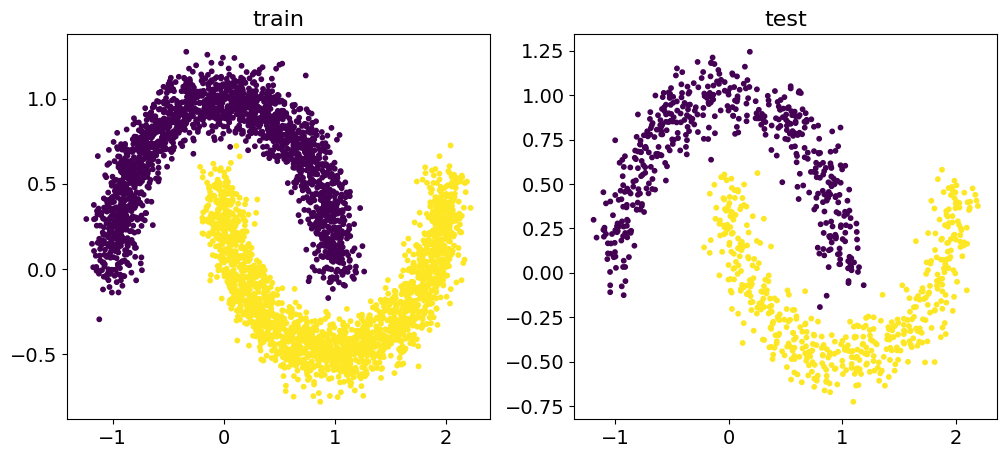

In [4]:
COUNT = 5_000

train_data, train_labels, test_data, test_labels = load_dataset('moons', size=COUNT, with_targets=True)
visualize_2d_data(train_data, test_data, train_labels, test_labels)

Let's revisit continuous normalizing flows (CNFs).

In CNFs, a central task is efficiently computing derivatives, particularly the trace of the Jacobian of the dynamics function $f(\mathbf{x}(t), t)$. As we saw in Lecture 11, the change in log-probability over time is given by:

$$
\frac{d \log p(\mathbf{x}(t))}{dt} = -\text{Tr}\left( \frac{\partial f(\mathbf{x}(t), t)}{\partial \mathbf{x}(t)} \right).
$$

In high-dimensional spaces computing the exact trace of the Jacobian $\frac{\partial f}{\partial \mathbf{x}}$ can be computationally expensive. To overcome this challenge, could be used **Hutchinson's Trace Estimator**, which provides an **efficient** and **unbiased** estimate:

$$
\text{Tr}\left( \frac{\partial f}{\partial \mathbf{x}} \right) = \mathbb{E}_{\mathbf{\epsilon} \sim p(\mathbf{\epsilon})} \left[ \mathbf{\epsilon}^\top \frac{\partial f}{\partial \mathbf{x}} \mathbf{\epsilon} \right],
$$

where $\mathbf{\epsilon}$ is a random vector sampled from a standard normal distribution $\mathcal{N}(0, \mathbf{I})$.

**Note:** In practice, we approximate this expectation using a single sample of $\mathbf{\epsilon}$ to efficiently estimate the trace.

However, since the data we consider in this task is only two-dimensional, we can easily compute the entire Jacobian. For this task we will use the same conditional model as in previous homeworks to parametrize $\frac{d \mathbf{x}(t)}{d t}$.

Firstly, lets define time embedding layer, that works with values in range $[0, 1]$.

**Note:** we can't use here `nn.Embedding`, because it takes only integers.

In [5]:
class TimeEmbedding(nn.Module):
    def __init__(self, dim: int):
        super().__init__()
        assert dim % 2 == 0
        self.dim = dim
        self.register_buffer('freqs', torch.arange(1, dim // 2 + 1) * torch.pi)

    def forward(self, t: torch.Tensor) -> torch.Tensor:
        emb = self.freqs * t.unsqueeze(-1)
        emb = torch.cat((emb.sin(), emb.cos()), dim=-1)
        return emb

In [6]:
class ConditionalMLP(nn.Module):
    def __init__(self, input_dim: int, hidden_dim: int = 128):
        super().__init__()

        self.hidden_dim = hidden_dim
        self.x_proj = nn.Linear(input_dim, self.hidden_dim)
        self.t_proj = TimeEmbedding(self.hidden_dim)
        self.backbone = nn.Sequential(
            nn.Linear(self.hidden_dim, self.hidden_dim),
            nn.Tanh(),
            nn.Linear(self.hidden_dim, self.hidden_dim),
            nn.Tanh(),
            nn.Linear(self.hidden_dim, input_dim),
        )

    def forward(self, x: torch.Tensor, t: torch.Tensor) -> Tuple[torch.Tensor]:
        x = self.x_proj(x)
        t = self.t_proj(t)
        x = x + t
        x = F.tanh(x)
        return self.backbone(x)


def test_conditional_mlp():
    SHAPE = [2, 20]
    x = torch.ones(SHAPE)
    t = torch.ones((2,)).long() * 5
    model = ConditionalMLP(input_dim=20)
    output = model(x, t)
    assert list(output.shape) == SHAPE


test_conditional_mlp()

In [18]:
class CNFModel(BaseModel):
    def __init__(self, input_dim: int, hidden_dim: int = 128):
        super().__init__()
        self.input_dim = input_dim
        self.model = ConditionalMLP(input_dim, hidden_dim)
        self.prior = Normal(torch.tensor(0.0), torch.tensor(1.0))

    def odefunc(self, t: torch.Tensor, states: Tuple[torch.Tensor]) -> Tuple[torch.Tensor]:
        z, _ = states
        with torch.set_grad_enabled(True):
            z.requires_grad_(True)
            # ====
            # your code
            # 1) apply model to get first order derivatives
            # 2) get second order derivative using torch.autograd
            # Do not forget to use epsilon

            # ====
            batch_size = z.shape[0]
            t_batch = t.expand(batch_size)
            dx_dt = self.model(z, t_batch)
            eps = torch.randn_like(z)
            # dx_dt_second = torch.autograd.grad(dx_dt, z, grad_outputs=eps, create_graph=True, retain_graph=True)[0]
            # trace = (dx_dt_second * eps).sum(dim=1, keepdim=True)
            
            grad_00 = torch.autograd.grad(dx_dt[:, 0].sum(), z,
                              create_graph=True)[0][:, 0:1] 
        
            grad_11 = torch.autograd.grad(dx_dt[:, 1].sum(), z,
                                          create_graph=True)[0][:, 1:2]
            trace = grad_00 + grad_11                     

            dz_dt=dx_dt

        return dz_dt, -trace

    def forward(self, x: torch.Tensor, reverse: bool = False) -> Tuple[torch.Tensor]:
        x = x.to(self.device)
        dz_dt = torch.zeros([x.shape[0], 1], device=self.device)

        # ====
        # your code
        # use odeint_adjoint to simulate self.odefunc
        # use reverse to simulate from 1 to 0 timesteps

        # ====
        t0, t1 = 0.0, 1.0
        t = torch.tensor([t0, t1], device=self.device)
        if reverse:
            t = t.flip(0)
        zs, logps = odeint_adjoint(
            self.odefunc,
            (x, dz_dt),
            t,
            atol=1e-5,
            rtol=1e-5,
            adjoint_params=tuple(self.model.parameters())
        )
        z_final = zs[-1]
        logp_diff = logps[-1]

        return z_final, logp_diff

    def loss(self, x: torch.Tensor) -> Dict[str, torch.Tensor]:
        z, delta_logp = self(x)
        logpz = self.prior.log_prob(z).sum(dim=1, keepdim=True)
        logpx = logpz + delta_logp
        loss = -logpx.mean()

        return {'total_loss': loss}

    @torch.no_grad()
    def sample(self, n: int) -> np.ndarray:
        # read carefully the sampling process
        z = self.prior.sample([n, self.input_dim]).to(self.device)
        x, _ = self(z, reverse=True)
        return x.cpu().numpy()

Now lets train the model, it takes some time :)

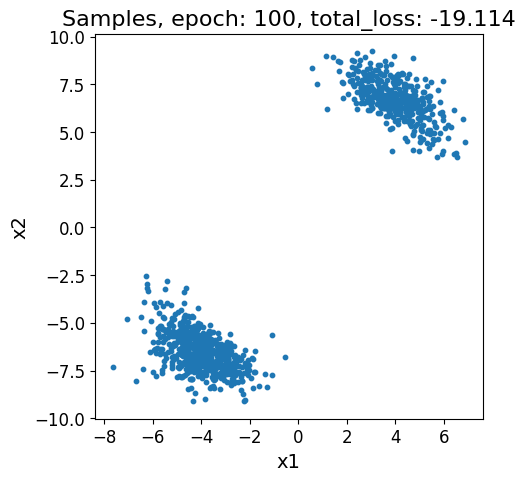

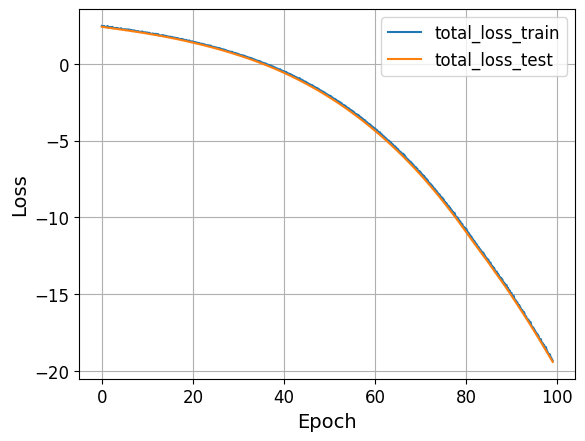

End of the training


In [23]:
# ====
# your code
# choose these parameters
BATCH_SIZE = 512
LR = 1e-4
EPOCHS = 100
HIDDEN_DIM = 32
# ====

model = CNFModel(input_dim=2, hidden_dim=HIDDEN_DIM)

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE)

# try your own optimizer/scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

train_model(
    model,
    train_loader,
    test_loader,
    epochs=EPOCHS,
    optimizer=optimizer,
    device=DEVICE,
    n_samples=1024,
    visualize_samples=True
)

In [12]:
1+1

2

## Task 3: Flow matching on MNIST (5 pt)

Finally, your task to train Flow matching model!

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:00<00:00, 72370403.48it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 2857647.88it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:00<00:00, 19488191.36it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 5316921.23it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



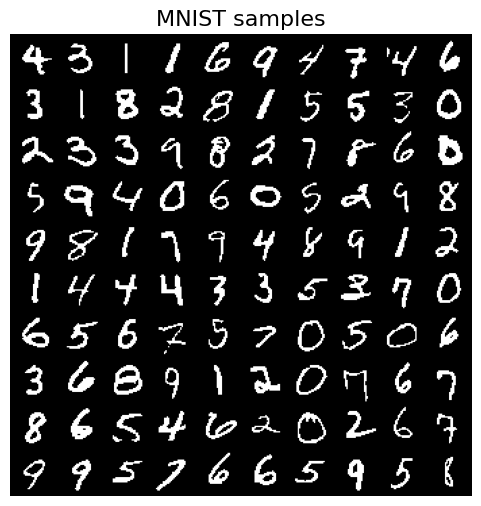

In [8]:
train_data, test_data = load_dataset("mnist", flatten=False, binarize=True)
visualize_images(train_data, "MNIST samples")

The model is written for you. We will use conditioned ResNet architecture. But you could change it if you want.

In [9]:
class ConditionedResnetBlock(nn.Module):
    def __init__(self, dim: int) -> None:
        super().__init__()
        # you could experiment with this architecture
        self.block = nn.Sequential(
            nn.Conv2d(dim, dim, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(dim, dim, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(dim, dim, kernel_size=1),
        )
        self.dim = dim
        self.embedding = TimeEmbedding(dim)

    def forward(self, x: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        time_embed = self.embedding(t).view(-1, self.dim, 1, 1)
        return x + self.block(x + time_embed)


class ConditionedSimpleResnet(nn.Module):
    def __init__(
        self, in_channels: int, out_channels: int, n_filters: int, n_blocks: int
    ) -> None:
        super().__init__()
        # you could experiment with this architecture
        self.first_block = nn.Sequential(
            nn.Conv2d(in_channels, n_filters, kernel_size=3, padding=1),
            nn.ReLU(),
        )
        self.layers = nn.Sequential(*[ConditionedResnetBlock(n_filters) for _ in range(n_blocks)])
        self.last_block = nn.Sequential(
            nn.ReLU(), nn.Conv2d(n_filters, out_channels, kernel_size=3, padding=1)
        )
        self.n_filters = n_filters

    def forward(self, x: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        x = self.first_block(x)
        for layer in self.layers:
            x = layer(x, t)
        x = self.last_block(x)
        return x


def test_conditioned_resnet():
    model = ConditionedSimpleResnet(in_channels=1, out_channels=1, n_filters=16, n_blocks=1)
    x = torch.rand((1, 1, 28, 28))
    t = torch.zeros(size=(1,), dtype=torch.long)
    out1 = model(x, t)
    t = torch.ones(size=(1,), dtype=torch.long)
    out2 = model(x, t)
    assert not np.allclose(out1.detach().numpy(), out2.detach().numpy())


test_conditioned_resnet()

In conditional flow matching, our objective is to learn a vector field $ f_\theta(\mathbf{x}, t) $, parameterized by a neural network, that aligns with a known target vector field $f(\mathbf{x}, \mathbf{x}_1, t)$ at each point along a path connecting the data distribution and a base distribution. So, the training objective is defined as:

$$
\min_\theta\, \mathbb{E}_{t \sim U[0, 1]}\, \mathbb{E}_{\mathbf{x}_1 \sim p(\mathbf{x}_1)} \mathbb{E}_{\mathbf{x} \sim p_t(\mathbf{x} | \mathbf{x}_1)} \left[ \left\| f(\mathbf{x}, \mathbf{x}_1, t) - f_\theta(\mathbf{x}, t) \right\|^2 \right],
$$

In this task, we consider the **optimal transport conditional vector field**, defined by:
$$
f(\mathbf{x}, \mathbf{x}_1, t) = \frac{d\mathbf{x}}{dt} = \frac{\mathbf{x}_1 - (1 - \sigma_{\text{min}})\mathbf{x}}{1 - (1 - \sigma_{\text{min}})t},
$$
which means that $\mathbf{x}$ iterpolates linearly by making data more noisy:
$$
\mathbf{x}_t = t \mathbf{x}_1 + (1 - (1 - \sigma_{\text{min}})t) \mathbf{x}_0.
$$

Now, let's define the architecture of the Flow Matching model.

In [10]:
class FlowMatchingModel(BaseModel):
    def __init__(self, in_channels: int, out_channels: int, n_filters: int, n_blocks: int):
        super().__init__()
        self.model = ConditionedSimpleResnet(
            in_channels, out_channels, n_filters, n_blocks
        )

    def forward(self, x: torch.Tensor, t: torch.Tensor):
        return self.model(x, t)

    def loss(self, x: torch.Tensor) -> Dict[str, torch.Tensor]:
        sigma_min = 1e-4
        # ====
        # your code
        # 1) samle time uniformly from 0 to 1
        # 2) calculate noised data and optimal flow
        # 3) predict flow using model
        # 4) calculate loss

        # ====
        t = torch.rand(x.size(0), device=x.device)
        t_exp = t.view(x.size(0), 1, 1, 1)
        x0 = torch.randn_like(x)
        
        xt = t_exp * x + (1 - (1 - sigma_min) * t_exp) * x0
        f_target = (x - (1 - sigma_min) * xt) / (1 - (1 - sigma_min) * t_exp)
        
        pred = self(xt, t)

        loss = ((f_target - pred)**2).mean()
        
        return {'total_loss': loss}

    def odefunc(self, t: torch.Tensor, x: torch.Tensor) -> torch.Tensor:
        return self(x, torch.full(x.shape[:1], t, device=self.device))

    @torch.no_grad()
    def sample(self, n: int) -> np.ndarray:
        # read carefully the sampling process
        z = torch.randn(n, 1, 28, 28, device=self.device)  # Start with noise

        # ====
        # your code
        # use odeint to sample from model
        # here we don't need to use adjoint because we use odeint only for sampling!

        # ====

        z = torch.randn(n, 1, 28, 28, device=self.device)
        t = torch.tensor([0.0, 1.0], device=self.device)
        states = odeint(self.odefunc, z, t, rtol=1e-5, atol=1e-5)
        samples = states[1]
        return samples.cpu().numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.03752583..1.0273705].


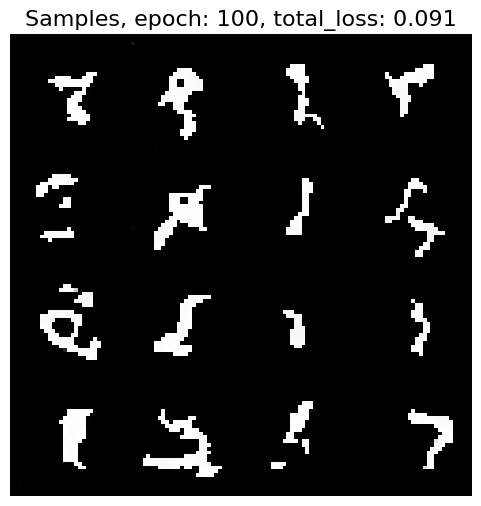

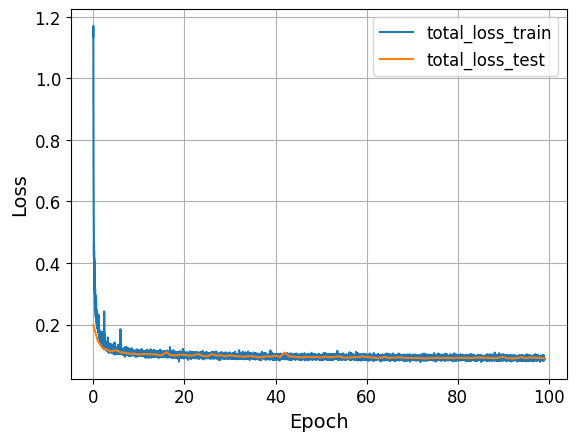

End of the training


In [11]:
# ====
# your code
# choose these parameters
BATCH_SIZE = 256
LR = 2e-4
EPOCHS = 100
N_FILTERS = 64
N_BLOCKS = 32
WEIGHT_DECAY = 1e-4
# ====

model = FlowMatchingModel(
    in_channels=1,
    out_channels=1,
    n_filters=N_FILTERS,
    n_blocks=N_BLOCKS
)

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE)

# choose any optimizer/scheduler as you want
optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

train_model(
    model,
    train_loader,
    test_loader,
    epochs=EPOCHS,
    optimizer=optimizer,
    device=DEVICE,
    n_samples=16,
    visualize_samples=True
)